In [2]:
import cv2
import numpy as np
from scipy import linalg
from  PIL import Image
import matplotlib.pyplot as plt

In [3]:
image = cv2.imread(r'C:\Users\HP\Desktop\Image_Segmentation\Images\Butterfly_Image_1.jpg',0)

In [4]:
cv2.imshow('Grayscale Image', image)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [5]:
image_pix = np.array(image)
print(image_pix)
print(image_pix.shape)

[[218 218 218 ... 218 218 218]
 [218 218 218 ... 218 218 218]
 [218 218 218 ... 218 218 218]
 ...
 [218 218 218 ... 218 218 218]
 [218 218 218 ... 218 218 218]
 [218 218 218 ... 218 218 218]]
(225, 225)


In [6]:
resized_image = cv2.resize(image, (512, 512))

In [7]:
cv2.imshow('Grayscale Image', resized_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [8]:
resized_image_pix = np.array(resized_image)
print(resized_image_pix)
print(resized_image_pix.shape)

[[218 218 218 ... 218 218 218]
 [218 218 218 ... 218 218 218]
 [218 218 218 ... 218 218 218]
 ...
 [218 218 218 ... 218 218 218]
 [218 218 218 ... 218 218 218]
 [218 218 218 ... 218 218 218]]
(512, 512)


In [9]:
quarter_width = resized_image_pix.shape[0] // 4
quarter_height = resized_image_pix.shape[1] // 4
print(quarter_width)
print(quarter_height)

128
128


In [10]:
part1 = resized_image[:quarter_height, :quarter_width]
print(part1)
cv2.imshow('Grayscale Image', part1)
cv2.waitKey(0)
cv2.destroyAllWindows()
part2 = resized_image[:quarter_height, quarter_width:2*quarter_width]
print(part2)
cv2.imshow('Grayscale Image', part2)
cv2.waitKey(0)
cv2.destroyAllWindows()
part3 = resized_image[quarter_height:2*quarter_height, :quarter_width]
print(part3)
cv2.imshow('Grayscale Image', part3)
cv2.waitKey(0)
cv2.destroyAllWindows()
part4 = resized_image[quarter_height:2*quarter_height, quarter_width:2*quarter_width]
print(part4)
cv2.imshow('Grayscale Image', part4)
cv2.waitKey(0)
cv2.destroyAllWindows()

[[218 218 218 ... 218 218 218]
 [218 218 218 ... 218 218 218]
 [218 218 218 ... 218 218 218]
 ...
 [218 218 218 ... 248 246 248]
 [218 218 218 ... 246 243 249]
 [218 218 218 ... 247 245 249]]


[[218 218 218 ... 218 218 218]
 [218 218 218 ... 218 218 218]
 [218 218 218 ... 218 218 218]
 ...
 [250 251 252 ... 255 255 255]
 [254 253 252 ... 255 255 255]
 [255 254 252 ... 255 255 255]]
[[218 218 218 ... 249 247 251]
 [218 218 218 ... 188 190 213]
 [218 218 218 ... 123 129 172]
 ...
 [218 218 218 ... 159 120 117]
 [218 218 218 ... 192 163 159]
 [218 218 218 ... 230 222 218]]
[[255 254 253 ... 255 255 255]
 [236 244 251 ... 255 255 255]
 [216 234 249 ... 255 255 255]
 ...
 [115  80  44 ...  82  56  37]
 [156 127  97 ...  63  42  27]
 [214 190 164 ...  30  19  18]]


In [11]:
part1_matrix = np.array(part1)
part2_matrix = np.array(part2)
part3_matrix = np.array(part3)
part4_matrix = np.array(part4)

part1_eigenvalues, part1_eigenvectors = linalg.eig(part1_matrix)
part2_eigenvalues, part2_eigenvectors = linalg.eig(part2_matrix)
part3_eigenvalues, part3_eigenvectors = linalg.eig(part3_matrix)
part4_eigenvalues, part4_eigenvectors = linalg.eig(part4_matrix)


In [12]:
eigenvalues1 = part1_eigenvalues.real
eigenvalues2 = part2_eigenvalues.real
eigenvalues3 = part3_eigenvalues.real
eigenvalues4 = part4_eigenvalues.real

In [13]:
eigenvalues1_mean = np.mean(eigenvalues1)
eigenvalues2_mean = np.mean(eigenvalues2)
eigenvalues3_mean = np.mean(eigenvalues3)
eigenvalues4_mean = np.mean(eigenvalues4)

In [14]:
segmentaion_threshold = min([eigenvalues1_mean,eigenvalues2_mean,eigenvalues3_mean,eigenvalues4_mean])

In [15]:
def quadtree(image, threshold):
    
    if image.shape[0] <= 8 or image.shape[1] <= 8 or np.all(image == image[0, 0]):
        return image

    # Split the image into four quadrants
    q1 = image[:image.shape[0] // 2, :image.shape[1] // 2]
    q2 = image[:image.shape[0] // 2, image.shape[1] // 2:]
    q3 = image[image.shape[0] // 2:, :image.shape[1] // 2]
    q4 = image[image.shape[0] // 2:, image.shape[1] // 2:]

    
    q1 = quadtree(q1, threshold)
    q2 = quadtree(q2, threshold)
    q3 = quadtree(q3, threshold)
    q4 = quadtree(q4, threshold)

    new_image = np.empty_like(image)
    new_image[:image.shape[0] // 2, :image.shape[1] // 2] = q1
    new_image[:image.shape[0] // 2, image.shape[1] // 2:] = q2
    new_image[image.shape[0] // 2:, :image.shape[1] // 2] = q3
    new_image[image.shape[0] // 2:, image.shape[1] // 2:] = q4
    new_image = np.where(new_image > threshold, 255, 0)

    return new_image



In [16]:
segmented_image = quadtree(resized_image, segmentaion_threshold)

In [17]:
type(segmented_image)

numpy.ndarray

In [18]:
seg_image = Image.fromarray(segmented_image.astype('uint8'))

In [19]:
resized_image = Image.fromarray(resized_image.astype('uint8'))

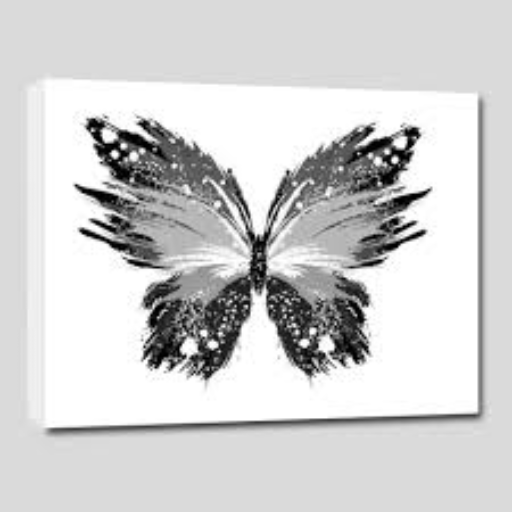

In [20]:
resized_image

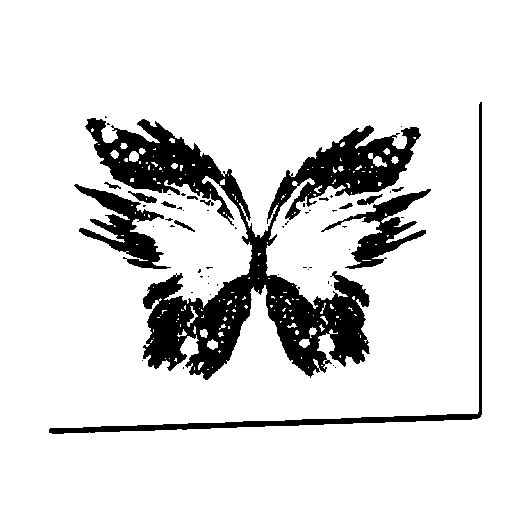

In [21]:
seg_image